In [1]:
from numpy import load
import matplotlib.pyplot as plt
import numpy
import os
import cv2
import pandas as pd

In [4]:
data = load('E:/Egyetem/data_sc/AI_szB/ok/pathmnist.npz')
lst = data.files
print(len(lst))
print("Adatok:")
for i in range(6):
    print(lst[i],':',len(data[lst[i]]), "db")

6
Adatok:
train_images : 89996 db
val_images : 10004 db
test_images : 7180 db
train_labels : 89996 db
val_labels : 10004 db
test_labels : 7180 db


In [5]:
target = [] #---> 0,1,2,3
image_data = [] #---->array

target = numpy.concatenate((data[lst[3]].flatten(), data[lst[4]].flatten(),data[lst[5]].flatten()))
image_data = numpy.concatenate((data[lst[0]], data[lst[1]],data[lst[2]]))

print(len(target))
print(len(image_data))

data_size = len(target)

107180
107180


In [6]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_data,target, test_size=0.2)

In [7]:
print(len(X_train))
print(len(y_train))
print(len(X_test[21]))
print(len(y_test))

train_size = len(X_train)
test_size = len(X_test)

85744
85744
28
21436


In [8]:
#print(X_train[23])
X_train = X_train.reshape(train_size,3*28*28)
#print(X_train[23])
X_test = X_test.reshape(test_size,3*28*28)

In [9]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [10]:
model.score(X_test, y_test) #pontosság

0.6626702743049077

[0]


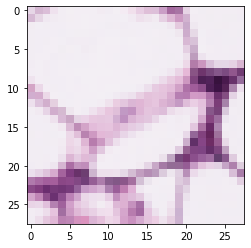

[2]


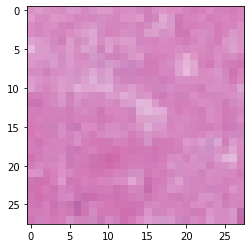

[6]


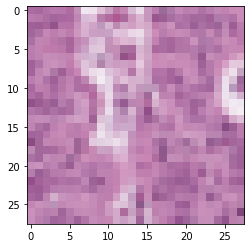

[3]


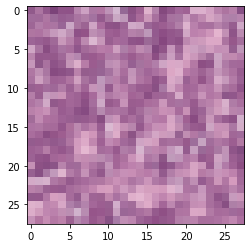

[4]


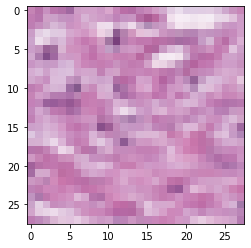

[0]


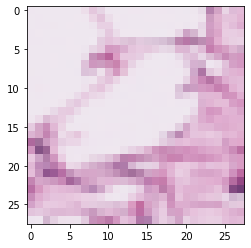

[0]


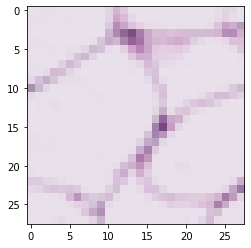

[8]


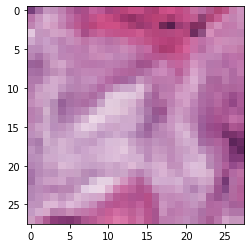

[5]


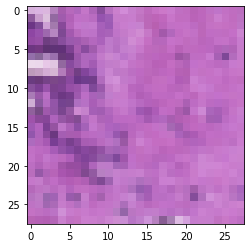

[5]


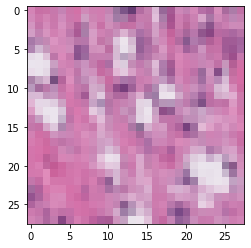

In [11]:
#megnézzük, hogy mit tippel pár random képre 

import random
for i in range (10):
    rand_num=random.randint(0,17999)
    print(model.predict([X_test[rand_num]]))
    plt.imshow(X_test[rand_num].reshape(28,28,3))
    plt.show()


In [13]:
from sklearn.metrics import confusion_matrix

# innentől már csak a confusion mátrixot készítjuk
Y_predicted = model.predict(X_test)

cm = confusion_matrix(y_test,Y_predicted)

Text(69.0, 0.5, 'Truth')

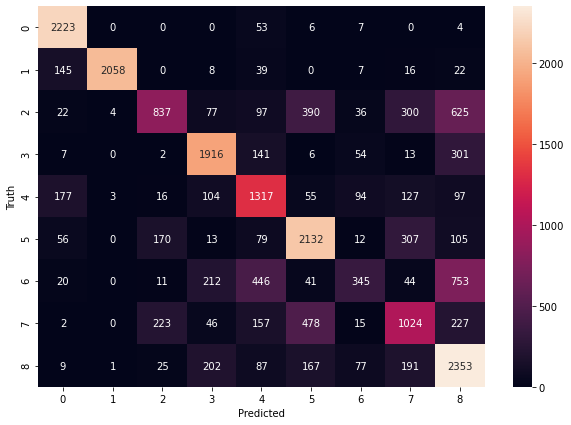

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')